In [17]:
import matplotlib.pyplot as plt
from pmd_beamphysics import ParticleGroup
import numpy as np
from pmd_beamphysics.units import mec2

In [1]:
from eblt.run import EBLT
import os
test = EBLT(input = "example1/eblt.in", workdir = os.environ.get('SCRATCH'), command = '/sdf/group/ad/sw/beta/bin/xeblt')

In [ ]:
os.environ["EBLT_BIN"] = "/sdf/group/ad/sw/beta/bin/"

In [3]:
output = test.run()

In [5]:
output.stats.model_fields.keys()

dict_keys(['distance', 'kinetic_energy', 'gamma', 'mean_z', 'rms_z', 'mean_delta_gamma', 'rms_delta_gamma'])

(0.0, 4358.1709564)

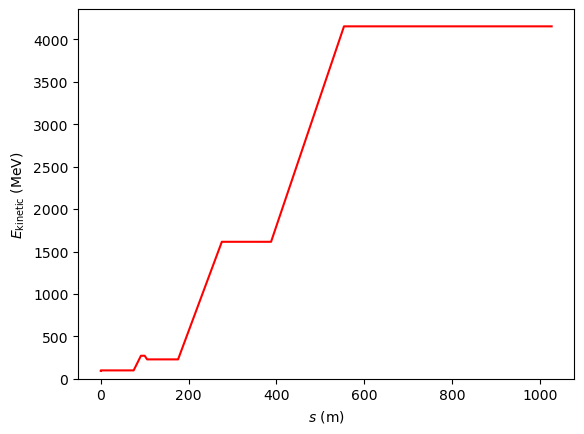

In [8]:
fig, ax = plt.subplots()
ax.plot(output.stats.distance, output.stats.kinetic_energy / 1e6, color="red")
ax.set_xlabel(r"$s$ (m)")
ax.set_ylabel(r"$E_\text{kinetic}$ (MeV)")
ax.set_ylim(0, None)

(0.0, 1.04322697199)

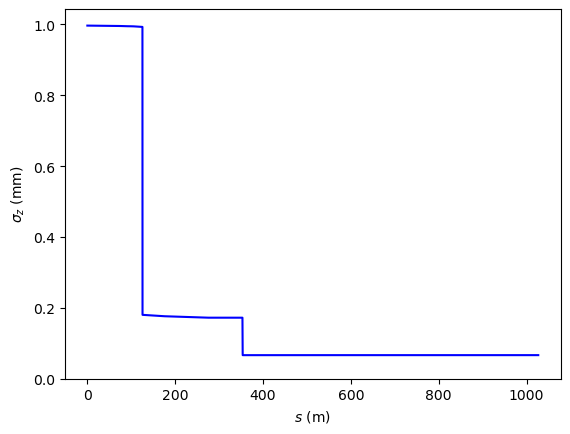

In [9]:
fig, ax = plt.subplots()
ax.plot(output.stats.distance, output.stats.rms_z * 1e3, color="blue")
ax.set_xlabel(r"$s$ (m)")
ax.set_ylabel(r"$\sigma_z$ (mm)")
ax.set_ylim(0, None)

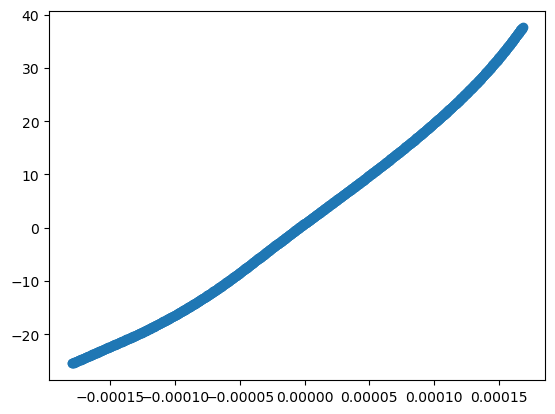

In [15]:
p = output.particle_distributions[201]
plt.scatter(p.z, p.delta_gamma)

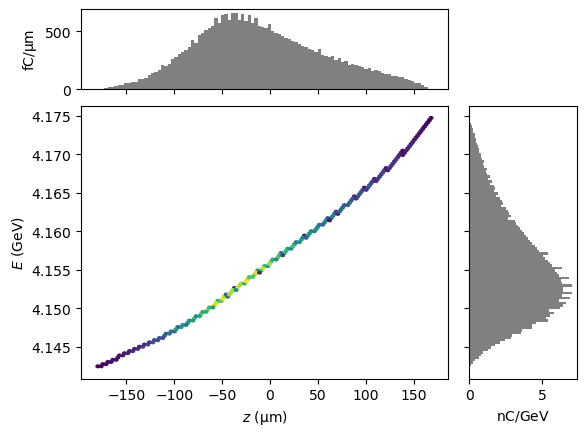

In [18]:
def particlegroup_data_from_eblt(p):
    z = p.z
    gamma = p.gamma
    weight = p.weight
    n = len(z)
    pz = np.sqrt(gamma**2 - 1) * mec2
    return dict(
        t=np.zeros(n),
        x=np.zeros(n),
        px=np.zeros(n),
        y=np.zeros(n),
        py=np.zeros(n),
        z=p.z,
        pz=pz,
        weight=weight,
        status=np.ones(n),
        species="electron",
    )


P = ParticleGroup(data=particlegroup_data_from_eblt(p))

P.plot("z", "energy", bins=100)

In [4]:
test.initial_particles = pg

In [6]:
pg.weight

array([5.e-16, 5.e-16, 5.e-16, ..., 5.e-16, 5.e-16, 5.e-16])

In [7]:
import numpy as np
np.sum(pg.weight)

np.float64(9.999999999999998e-11)

In [8]:
pg = test.initial_particles.to_particlegroup_data()

In [ ]:

test.initial_particles

In [5]:
test.write_initial_particles('./test')

In [5]:
test.write_initial_particles('./test2')

In [10]:
from eblt.particles import EBLTParticleData

In [12]:
test2 = EBLTParticleData.from_EBLT_outputfile('./example1/fort.101', Ek = test._input.parameters.Ek)

Shifting delta_e_over_e0 and delta_gamma given Ek


In [13]:
pg = test2.to_particlegroup_data()


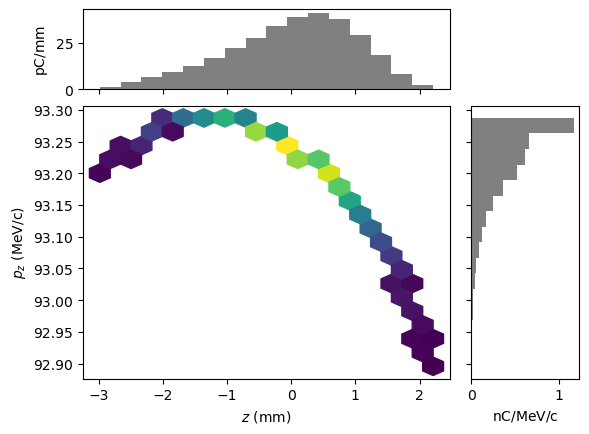

In [14]:
pg.plot('z', 'pz')

In [16]:
test.initial_particles = pg

In [17]:
test.write_initial_particles('./test')